# Employee Turnover Analytics

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.<br><br>
Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company. <br><br>
The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.<br><br>
1.	**Perform data quality check by checking for missing values if any.**<br>
2.	**Understand what factors contributed most to employee turnover by EDA.**<br>
3.	**Perform clustering of Employees who left based on their satisfaction and evaluation.**<br>
4.	**Handle the left Class Imbalance using SMOTE technique.**<br>
5.	**Perform k-fold cross-validation model training and evaluate performance.**<br>
6.	**Identify the best model and justify the evaluation metrics used.**<br>
7.	**Suggest various retention strategies for targeted employees.**<br>

__Importing required libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as matplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('empdata.xlsx')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#Renaming the columns for more readability
df=df.rename(columns={'satisfaction_level':'satisfaction',
                     'last_evaluation':'evaluation',
                     'number_project':'projectCount',
                     'average_montly_hours':'averageMonthlyhours',
                     'time_spend_company':'yearsAtCompany',
                     'Work_accident':'workAccident',
                     'promotion_last_5years':'promotion',
                      'sales':'Department',
                     'left':'turnover'})

In [5]:
df.isna().sum()

satisfaction           0
evaluation             0
projectCount           0
averageMonthlyhours    0
yearsAtCompany         0
workAccident           0
turnover               0
promotion              0
Department             0
salary                 0
dtype: int64

- There are no null values in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   satisfaction         14999 non-null  float64
 1   evaluation           14999 non-null  float64
 2   projectCount         14999 non-null  int64  
 3   averageMonthlyhours  14999 non-null  int64  
 4   yearsAtCompany       14999 non-null  int64  
 5   workAccident         14999 non-null  int64  
 6   turnover             14999 non-null  int64  
 7   promotion            14999 non-null  int64  
 8   Department           14999 non-null  object 
 9   salary               14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.shape

(14999, 10)

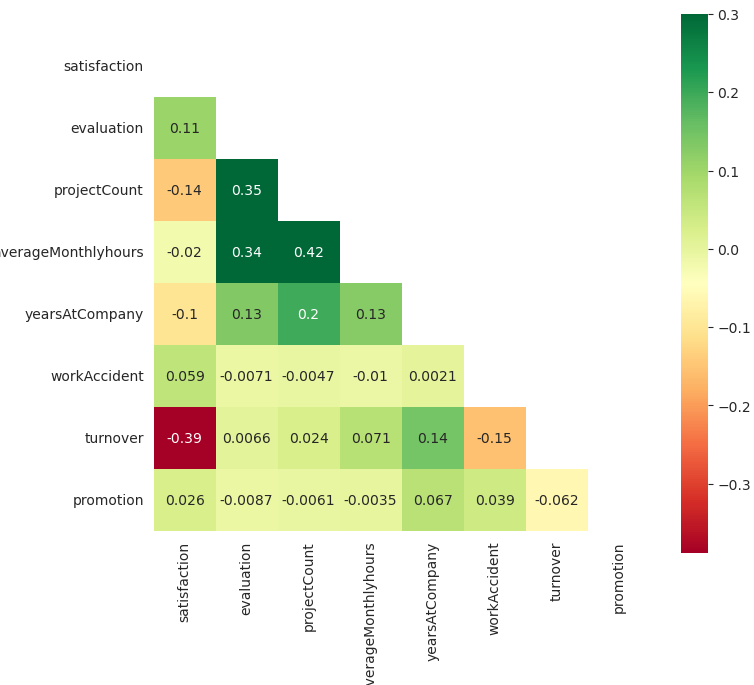

In [8]:
#Plot correlation heatmap for infering the relation among all the features
corr=df.corr(numeric_only=True)
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
#This masks the upper triangular indices and doen't show those values in the heatmap.
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(8,7))
    ax=sns.heatmap(corr,mask=mask,vmax=0.3,square=True,annot=True,cmap='RdYlGn')
    
plt.show()

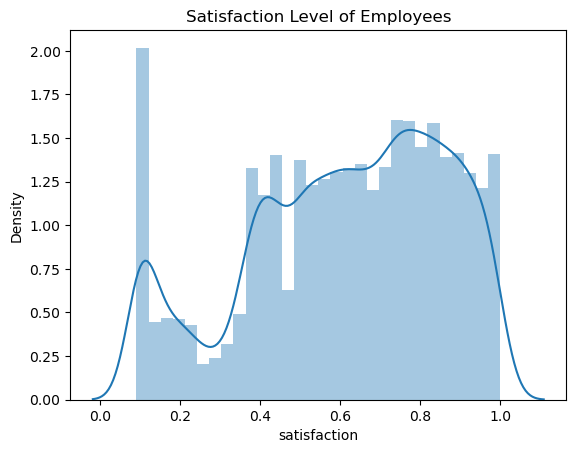

In [9]:
#Distribution plot of Satisfaction Level of Employees
sns.distplot(df['satisfaction'])
plt.title('Satisfaction Level of Employees')
plt.show()

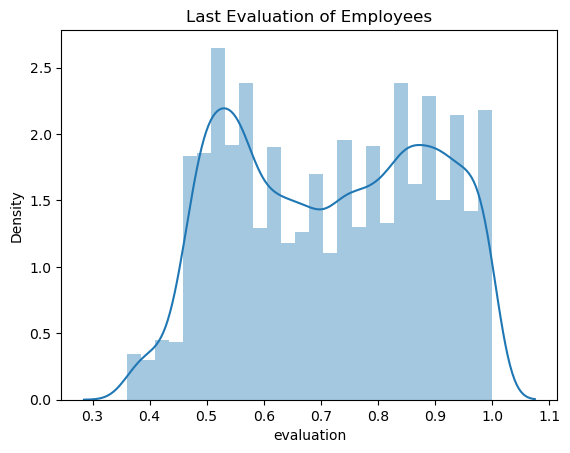

In [10]:
#Distribution plot of Last Evaluation of Employees
sns.distplot(df['evaluation'])
plt.title('Last Evaluation of Employees')
plt.show()

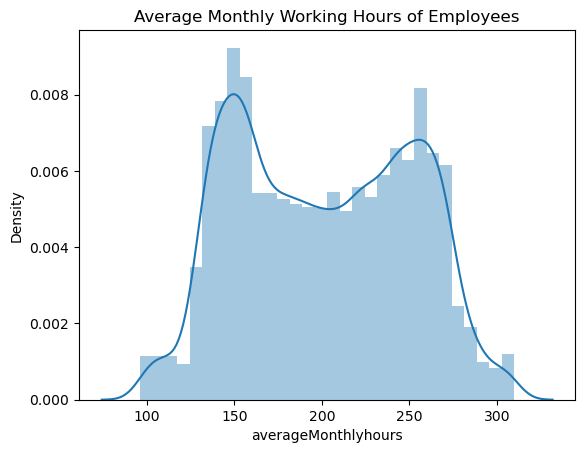

In [11]:
#Distribution plot of Average Monthly Working Hours of Employees
sns.distplot(df['averageMonthlyhours'])
plt.title('Average Monthly Working Hours of Employees')
plt.show()

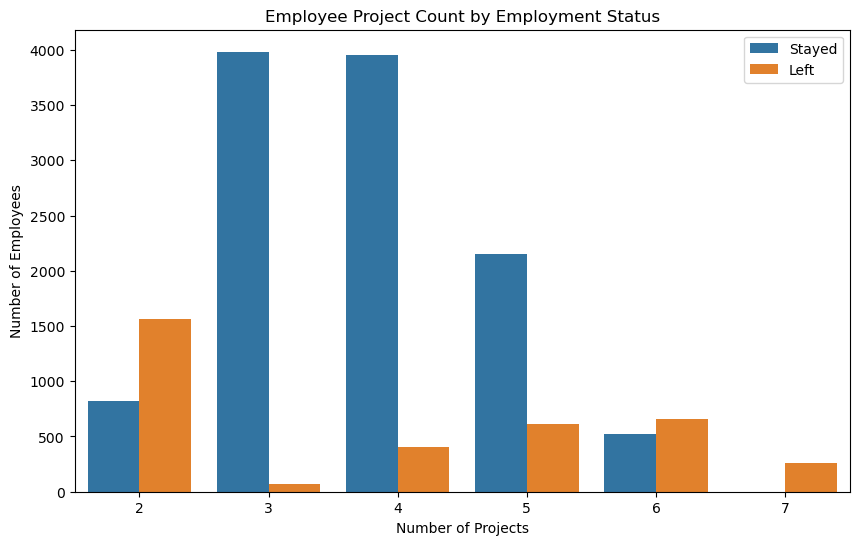

In [12]:
# Plot a barplot between Number of Projects and Number of Employees(Both stayed and left)
plt.figure(figsize=(10, 6))
sns.countplot(x='projectCount', hue='turnover', data=df)
plt.title('Employee Project Count by Employment Status')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(labels=['Stayed', 'Left'])
plt.show()

__Observation:__
- We can clearly observe that employees having projects in the range 3-5 are more likely to stay in the organization.
- Employees are willing to leave even if they have less projects or more number of projects.

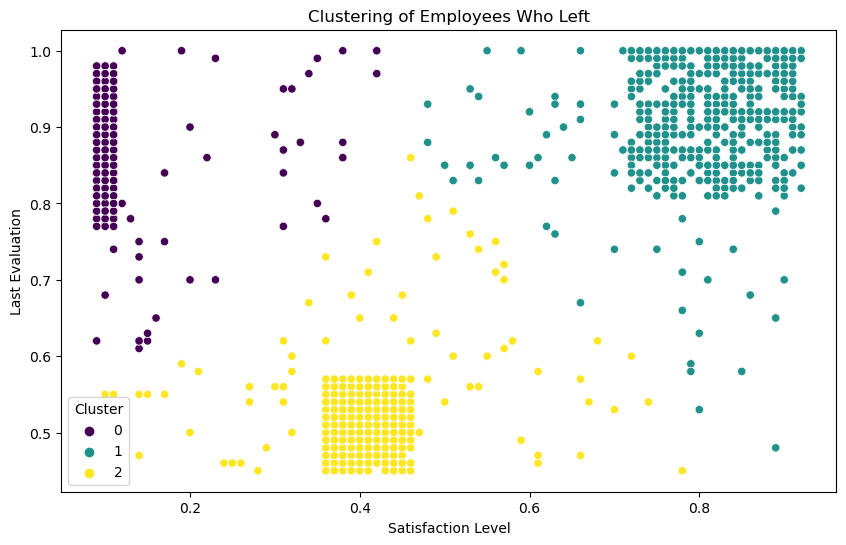

In [13]:
from sklearn.cluster import KMeans

# Selecting relevant columns
left_employees = df[df['turnover'] == 1][['satisfaction', 'evaluation']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed
kmeans.fit(left_employees)

# Assign cluster labels
left_employees['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction', y='evaluation', hue='cluster', data=left_employees, palette='viridis')
plt.title('Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

__Observation:__
- It is clearly visible that even people with good satisfaction level and good rating by manager are more in number who left the organization, this might be because of the employees looking for Career Growth opportunities, Work-Life Balance, Compensation and Benefits and various other reasons.
- And it is also quite obvious that employees with low satisfaction level and less rating by managers are also more in number who left the organization.

In [14]:
df['turnover'].value_counts()

turnover
0    11428
1     3571
Name: count, dtype: int64

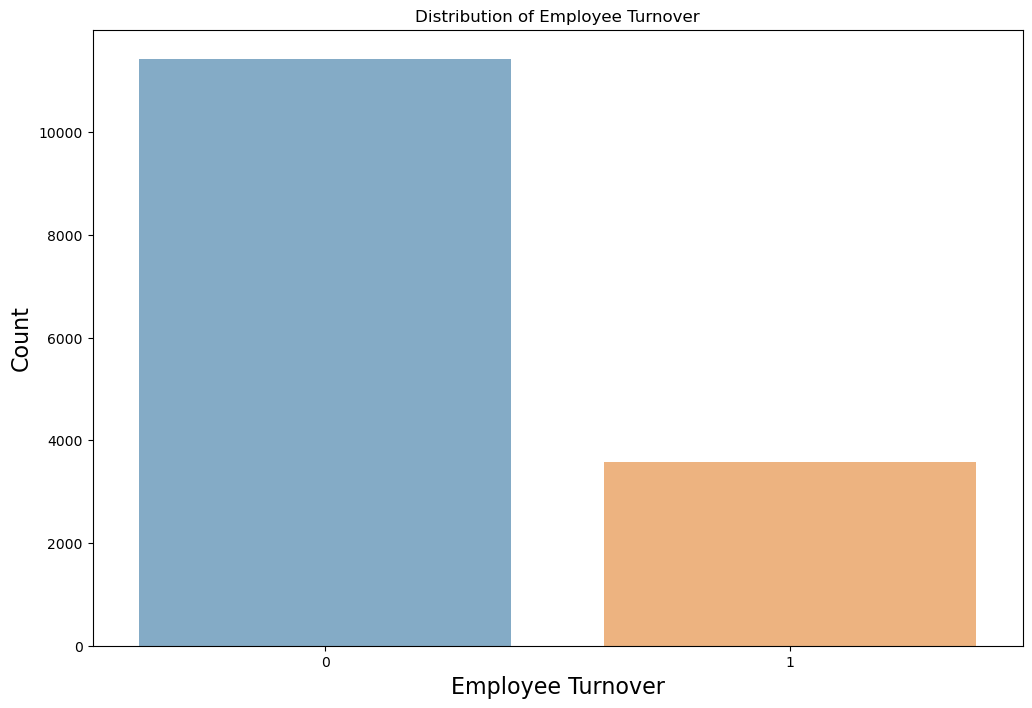

In [15]:
plt.figure(figsize=(12,8))
turnover = df.turnover.value_counts()
sns.barplot(y=turnover.values,x=turnover.index,alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

In [16]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [17]:
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyhours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
Department              object
salary                  object
dtype: object

In [18]:
# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical columns:")
for col in categorical_columns:
    print(col)

Categorical columns:
Department
salary


In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

# Convert categorical variables to dummy variables
categorical_df = pd.get_dummies(df[categorical_columns], drop_first=True)

# Combine categorical and numerical variables
processed_df = pd.concat([df[numerical_columns], categorical_df], axis=1)

# Separate features and target variable
X = processed_df.drop('turnover', axis=1)
y = processed_df['turnover']

# Stratified split of the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Upsample the train dataset using SMOTE technique
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
round(y.value_counts(normalize=True)*100,2).astype(str)+'%'

turnover
0    76.19%
1    23.81%
Name: proportion, dtype: object

In [21]:
#After resampling of data, checking the data distribution
round(y_train_resampled.value_counts(normalize=True)*100,2).astype(str)+'%'

turnover
0    50.0%
1    50.0%
Name: proportion, dtype: object

In [22]:
categorical_df.head()

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,True,False,False,True,False


In [23]:
processed_df.head()

,satisfaction,evaluation,projectCount,averageMonthlyhours,yearsAtCompany,workAccident,turnover,promotion,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


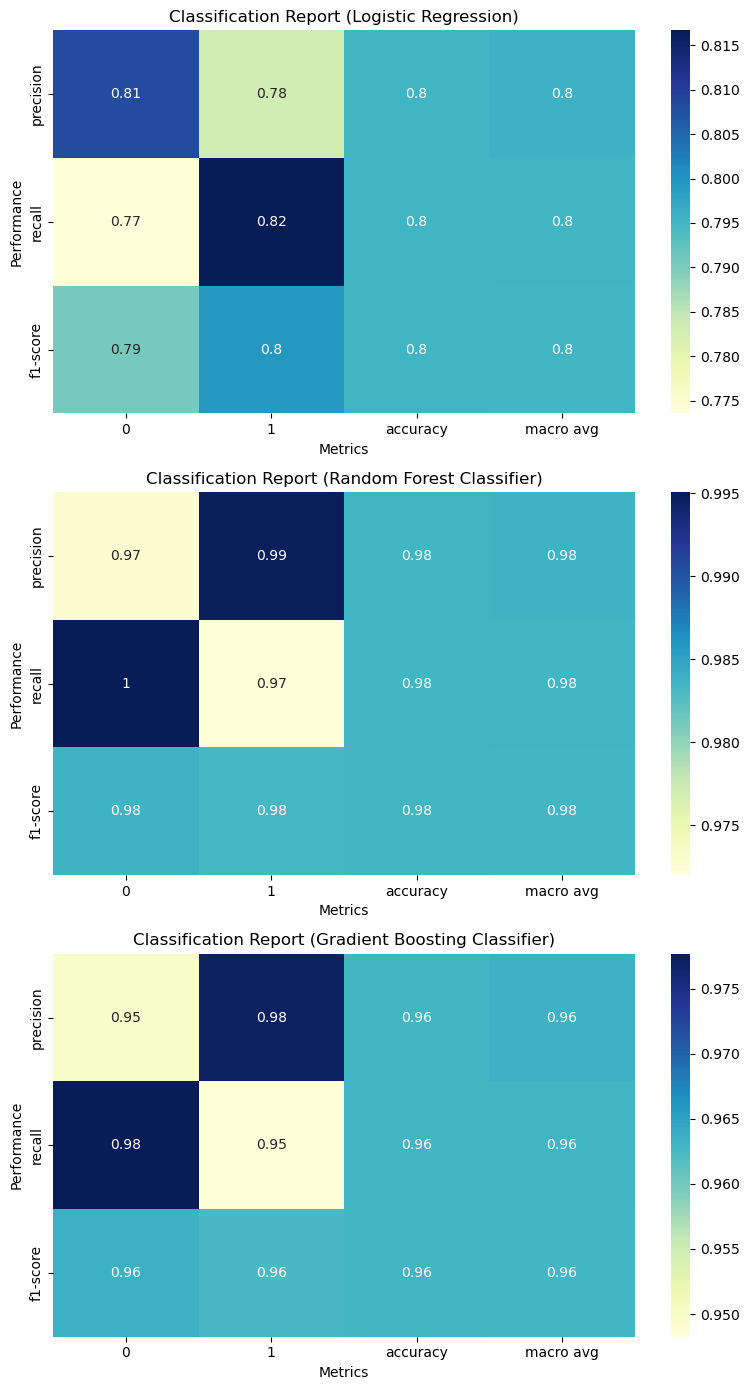

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

# Initialize plots
fig, axes = plt.subplots(3, 1, figsize=(8, 14))

# Perform 5-Fold cross-validation, train models, and plot classification reports
for i, (name, model) in enumerate(models.items()):
    # Perform 5-Fold cross-validation
    cv_predictions = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=5)
    
    # Get classification report
    report = classification_report(y_train_resampled, cv_predictions, output_dict=True)
    
    # Plot classification report
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :-1], annot=True, cmap='YlGnBu', ax=axes[i])
    axes[i].set_title(f'Classification Report ({name})')
    axes[i].set_xlabel('Metrics')
    axes[i].set_ylabel('Performance')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix for each model
for name, model in models.items():
    
    model.fit(X_train_resampled, y_train_resampled)
    # Predict labels
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display confusion matrix
    print(f"\n{name} Confusion Matrix:")
    print(conf_matrix)


Logistic Regression Confusion Matrix:
[[1767  519]
 [ 184  530]]

Random Forest Classifier Confusion Matrix:
[[2271   15]
 [  17  697]]

Gradient Boosting Classifier Confusion Matrix:
[[2231   55]
 [  47  667]]


- __Recall__ should be prioritized if the __cost of missing an employee who actually leaves (false negatives) is high.__ For example, if the organization wants to ensure that they identify as many employees as possible who are likely to leave, they should prioritize recall.
- __Precision__ should be prioritized if the __cost of incorrectly flagging an employee who actually stays (false positives) is high.__ For example, if the organization wants to minimize the resources spent on retention efforts for employees who are unlikely to leave, they should prioritize precision.
- Without additional information about the specific costs or consequences associated with false positives and false negatives in the context of employee turnover prediction, it's challenging to definitively determine whether recall or precision should be prioritized. However, based on the general principle that it's often more costly to miss employees who actually leave (false negatives), __prioritizing recall may be more appropriate in this scenario.__

In [26]:
from sklearn.metrics import accuracy_score

# Initialize dictionaries to store accuracy scores
accuracy_scores = {}

# Evaluate accuracy for each model
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict labels for the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store accuracy score in the dictionary
    accuracy_scores[name] = accuracy

# Display accuracy scores
print("Accuracy Scores:")
for name, score in accuracy_scores.items():
    print(f"{name}: {score:.4f}")

# Identify the best model based on the highest accuracy score
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nBest Model: {best_model_name} (Accuracy: {accuracy_scores[best_model_name]:.4f})")

Accuracy Scores:
Logistic Regression: 0.7657
Random Forest Classifier: 0.9897
Gradient Boosting Classifier: 0.9660

Best Model: Random Forest Classifier (Accuracy: 0.9897)


- We can clearly observe that __Best Model is Random Forest Classifier with Accuracy:0.9893__

In [27]:
best_model = models['Random Forest Classifier']  # Random Forest Classifier is the best model

# Fit the model to the training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities of turnover for the test data
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# Display the predicted probabilities
print("Predicted Probabilities of Turnover:")
print(y_proba_test)

Predicted Probabilities of Turnover:
[0.   0.62 0.03 ... 0.03 0.05 0.99]


In [28]:
# Define probability score ranges for each zone
safe_zone = 0.2
low_risk_zone = 0.6
medium_risk_zone = 0.9

# Categorize employees into four zones
employee_zones = []
for prob in y_proba_test:
    if prob < safe_zone:
        employee_zones.append("Safe Zone (Green)")
    elif safe_zone < prob < low_risk_zone:
        employee_zones.append("Low Risk Zone (Yellow)")
    elif low_risk_zone < prob < medium_risk_zone:
        employee_zones.append("Medium Risk Zone (Orange)")
    else:
        employee_zones.append("High Risk Zone (Red)")

In [29]:
import pandas as pd

# Assuming 'employee_zones' contains the categories for each employee
employee_zones_series = pd.Series(employee_zones, name='Retention Zone')

# Concatenate the original DataFrame with the employee zones Series
df_with_zones = pd.concat([df, employee_zones_series], axis=1)

# Display the DataFrame with the new column
df_with_zones[df_with_zones['turnover']== 1].head()

,satisfaction,evaluation,projectCount,averageMonthlyhours,yearsAtCompany,workAccident,turnover,promotion,Department,salary,Retention Zone
0,0.38,0.53,2,157,3,0,1,0,sales,low,Safe Zone (Green)
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Medium Risk Zone (Orange)
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Safe Zone (Green)
3,0.72,0.87,5,223,5,0,1,0,sales,low,Safe Zone (Green)
4,0.37,0.52,2,159,3,0,1,0,sales,low,Safe Zone (Green)


In [30]:
# Filter the DataFrame to only include rows where the retention zone is "High Risk Zone (Red)"
high_risk_df = df_with_zones[df_with_zones['Retention Zone'] == 'High Risk Zone (Red)']

# Display the filtered DataFrame
high_risk_df

,satisfaction,evaluation,projectCount,averageMonthlyhours,yearsAtCompany,workAccident,turnover,promotion,Department,salary,Retention Zone
10,0.45,0.54,2,135,3,0,1,0,sales,low,High Risk Zone (Red)
12,0.84,0.92,4,234,5,0,1,0,sales,low,High Risk Zone (Red)
15,0.38,0.54,2,143,3,0,1,0,sales,low,High Risk Zone (Red)
19,0.76,0.89,5,262,5,0,1,0,sales,low,High Risk Zone (Red)
21,0.38,0.55,2,147,3,0,1,0,sales,low,High Risk Zone (Red)
...,...,...,...,...,...,...,...,...,...,...,...
2966,0.73,0.86,4,196,4,1,0,0,IT,low,High Risk Zone (Red)
2976,0.24,0.55,5,208,5,0,0,0,RandD,low,High Risk Zone (Red)
2984,0.98,0.50,4,207,3,0,0,0,marketing,low,High Risk Zone (Red)
2986,0.51,0.75,4,154,3,0,0,0,marketing,medium,High Risk Zone (Red)


In [31]:
high_risk_df['turnover'].value_counts()

turnover
1    464
0    206
Name: count, dtype: int64

1. **Safe Zone (Green) (Score < 20%)**:
   - Retention Strategies:
     - Acknowledge and recognize employees' contributions regularly.
     - Offer opportunities for career growth and development.
     - Provide incentives or rewards for exceptional performance.
     - Foster a positive work environment and culture of appreciation.
     - Conduct stay interviews to understand what factors contribute to their satisfaction and loyalty.

2. **Low Risk Zone (Yellow) (20% < Score < 60%)**:
   - Retention Strategies:
     - Regularly check in with employees to assess their satisfaction and engagement levels.
     - Provide opportunities for skill development and advancement.
     - Implement flexible work arrangements to support work-life balance.
     - Offer additional perks or benefits to enhance job satisfaction.
     - Conduct employee surveys to gather feedback and address any concerns proactively.

3. **Medium Risk Zone (Orange) (60% < Score < 90%)**:
   - Retention Strategies:
     - Identify and address potential areas of dissatisfaction or concern.
     - Provide mentoring or coaching to support employee development.
     - Offer opportunities for cross-functional projects or roles.
     - Implement retention bonuses or incentives for high-performing employees.
     - Conduct career planning discussions to align employees' goals with organizational objectives.

4. **High Risk Zone (Red) (Score > 90%)**:
   - Retention Strategies:
     - Take immediate action to address any issues or concerns raised by employees.
     - Provide personalized support and resources to address work-related challenges.
     - Offer opportunities for upskilling or reskilling to enhance job satisfaction.
     - Conduct exit interviews to understand the reasons behind employees' intentions to leave.
     - Implement targeted retention initiatives, such as career pathing or leadership development programs, to retain top talent.

By categorizing employees into these zones based on their probability scores and implementing tailored retention strategies for each zone, organizations can effectively address turnover risks and improve employee retention.